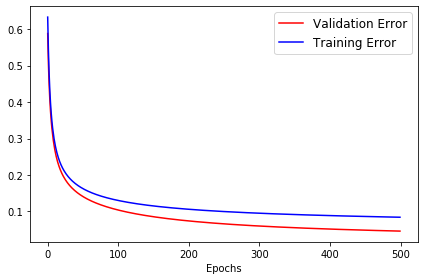

0.9824561403508771 0.9615384615384616 1.0


In [23]:
"""Complete model with training, testing and validation. eta has been varied and the optimum value of 0.01 has been set"""

import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Preprocessing begins.....

#Read the dataset
#Drop the ID column
dataset1=pd.read_csv('wdbc.dataset')
dataset1=dataset1.drop(axis=1,columns=['842302'])

#normalization function
#Using formula x_normalized=(x_original-min)/(max-min)

def normalize(dataset):
    nrow,ncol=dataset.shape
    
    new_data=[]
    new_data.append(dataset.iloc[:,0].tolist())
    
    for i in range(1,ncol):
        list1=dataset.iloc[:,i].tolist()
        maxl=max(list1)
        minl=min(list1)
        for j in range(len(list1)):
            list1[j]=(list1[j]-minl)/(maxl-minl)
        new_data.append(list1)
    dataset=pd.DataFrame(new_data)
    dataset=dataset.transpose()
    return dataset

#normalizing the Dataset
dataset1=normalize(dataset1)
rows,columns=dataset1.shape

#Split the dataset into 80% Training,10% Validation and 10%Testing

training_data,testing_data = train_test_split(dataset1,test_size=0.10)
training_data,validation_data = train_test_split(training_data,test_size=0.10)

#Preprocessing ends.....

#Training and Testing the model starts.....

#extracting class labels of training data and converting M to class 1 and B to class 0
 
actual_labels_training=training_data.iloc[:,0].tolist()
for i in range(len(actual_labels_training)):
    if(actual_labels_training[i]=='M'):
        actual_labels_training[i]=1
    else:
        actual_labels_training[i]=0

#extracting class labels of testing data and converting M to class 1 and B to class 0
 
actual_labels_testing=testing_data.iloc[:,0].tolist()
for i in range(len(actual_labels_testing)):
    if(actual_labels_testing[i]=='M'):
        actual_labels_testing[i]=1
    else:
        actual_labels_testing[i]=0

#extracting class labels of validation data and converting M to class 1 and B to class 0
 
actual_labels_validation=validation_data.iloc[:,0].tolist()
for i in range(len(actual_labels_validation)):
    if(actual_labels_validation[i]=='M'):
        actual_labels_validation[i]=1
    else:
        actual_labels_validation[i]=0        

        
prediction_list=[]   # required for testing
features=columns-1
weights=[random.uniform(0,0.01) for x in range(features+1)]   #hyperparameters of the model, including bias
eta=0.01      # eta has been set to 0.01 based on experiment on the cells below
training_error_list=[]    #Stores training errors for graph plot
validation_error_list=[]    #Stores validation errors for graph plot
epochs=500

#Calculating dot product of 2 lists
def dotproduct(a,b):
    p=0
    for i in range(len(a)):
        p+=a[i]*b[i]
    return p

#Sigmoid activation function returns value 0 to 1.
#Upper Bound and Lower Bound has been set to escape nan values while calculating cross entropy loss.
def activation_function(z):
    sig = 1 / (1 + np.exp(-z))     # Define sigmoid function
    sig = np.minimum(sig, 0.999999)  # Set upper bound
    sig = np.maximum(sig, 0.000001)  # Set lower bound
    return sig

#Updating the weights using gradient descent formula
def weights_update(x,diff,eta_local):
    for i in range(len(weights)):
        weights[i]=weights[i]-eta_local*x[i]*diff

#Training function

def training(eta_local,epochs_local):
    
    epochs_fixed=epochs_local
    ve=0
    while(epochs_local>0): #for all epochs
        te=0
        for m in range(len(training_data)): #for all training samples
            x=([1]+(training_data.iloc[m,:].tolist())[1:]) #Appending 1 to input vector to accommodate bias
            z=dotproduct(weights,x) #dot product w^TX
            class_pred=activation_function(z) #Sigmoid activation function returns value 0 to 1
            diff=class_pred-actual_labels_training[m] #Difference between prediction and actual class label
            te=te+(-(actual_labels_training[m]*np.log(class_pred))-((1-actual_labels_training[m])*np.log(1-class_pred)))
            #calculating training error as cross entropy error
            
            weights_update(x,diff,eta_local) #Update weights using gradient descent
            
        te=te/len(training_data) #Taking average of training loss for all sample
        ve=validation() #Calculating validation loss for every epoch
        training_error_list.append(te)
        validation_error_list.append(ve)
        epochs_local-=1
    graph_plot(epochs_fixed,eta_local) #plotting training and validation loss vs epochs

#Validation Function 
def validation():
    error=0
    for n in range(len(validation_data)): #for all samples in validation data
        x=([1]+(validation_data.iloc[n,:].tolist())[1:]) #Appending 1 to input vector to accommodate bias
        z=dotproduct(weights,x)   #dot product w^TX
        class_pred=activation_function(z)  #Sigmoid activation function returns value 0 to 1
        error=error+(-(actual_labels_validation[n]*np.log(class_pred))-((1-actual_labels_validation[n])*np.log(1-class_pred)))
        #calculating validation error as cross entropy error
        
    error=error/(len(validation_data))   #Taking average of training loss for all samples
    return (error)

def testing():   
    
    for n in range(len(testing_data)):  #for all samples in testing data
        x=([1]+(testing_data.iloc[n,:].tolist())[1:]) #Appending 1 to input vector to accommodate bias
        z=dotproduct(weights,x) #dot product w^TX
        class_pred=activation_function(z) #Sigmoid activation function returns value 0 to 1
        if class_pred>0.5:     #Using decision boundary of 0.5
            class_pred=1
        else:
            class_pred=0
        prediction_list.append(class_pred)
    a,p,r=metrics() #finding accuracy,precision and recall
    return (a,p,r)
        
    
#Calculating accuracy, precision, recall using confusion matrix
def metrics():
    
    tp=0
    fp=0
    tn=0
    fn=0
    
    for i in range(len(prediction_list)):
        if(prediction_list[i]==1 and actual_labels_testing[i]==1):
            tp+=1
        if(prediction_list[i]==1 and actual_labels_testing[i]==0):
            fp+=1
        if(prediction_list[i]==0 and actual_labels_testing[i]==0):
            tn+=1
        if(prediction_list[i]==0 and actual_labels_testing[i]==1):
            fn+=1
            
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=(tp/(tp+fp))
    recall=(tp/(tp+fn))
    
    return (accuracy,precision,recall)

"""Graph plot for Training and Validation Loss vs Epochs"""

def graph_plot(epochsl,etal):
    xaxis = np.arange(epochsl)

    plt.plot(xaxis, validation_error_list, color='red')
    plt.plot(xaxis, training_error_list, color='blue')
    plt.xlabel('Epochs',fontsize=10)

    plt.legend(['Validation Error','Training Error'], loc='upper right',fontsize=12)
    plt.tight_layout()
    plt.savefig('VT_Error'+str(epochs)+'_'+str(etal)+'.png')
    plt.show()
    
    
#Training and Testing the model end.....    

training(eta,epochs)
acc,prec,rec=testing()   
print(acc,prec,rec)
    

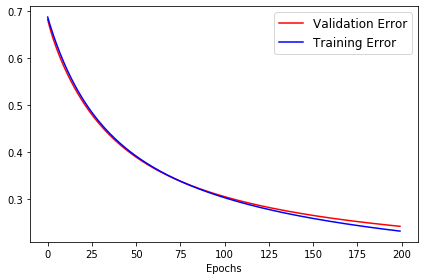

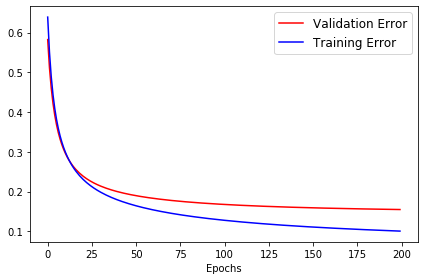

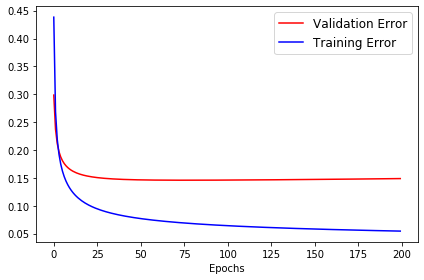

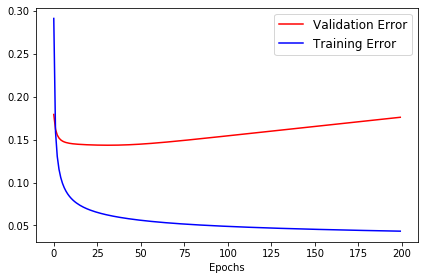

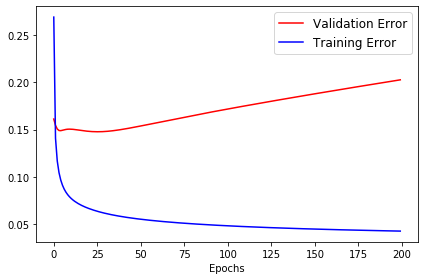

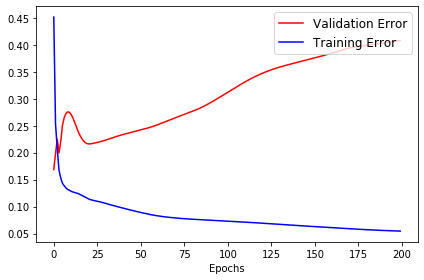

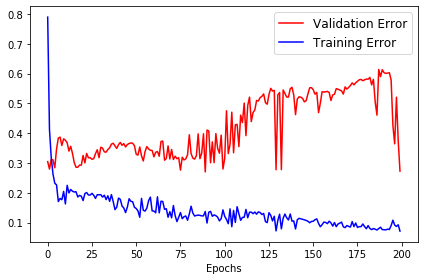

In [16]:
"""Calculating the optimum eta"""

eta_list=[0.001,0.01,0.1,0.5,1,3,5]
for eta_el in eta_list:
    weights=[random.uniform(0,0.01) for x in range(features)]
    training_error_list=[]
    validation_error_list=[]
    training(eta_el,200)

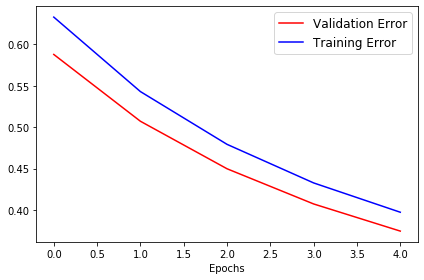

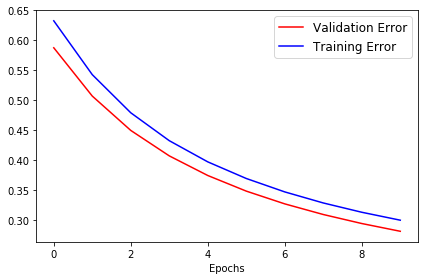

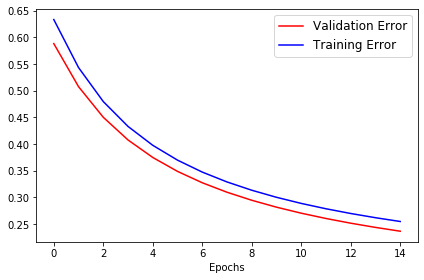

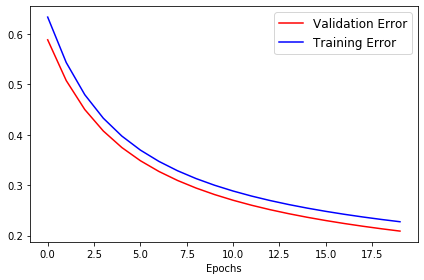

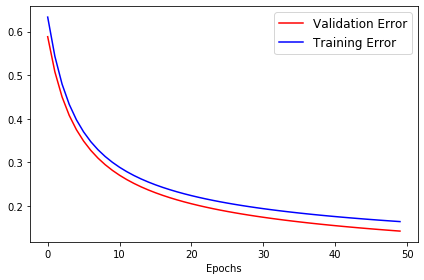

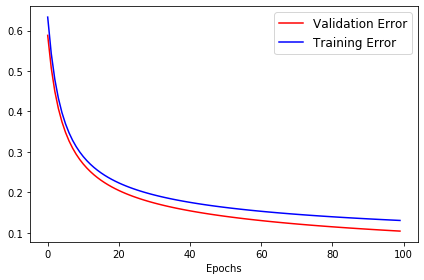

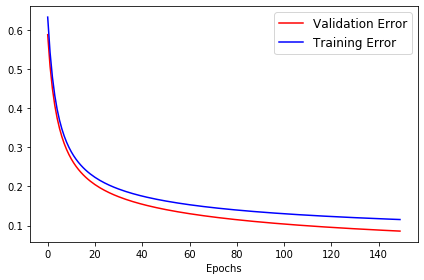

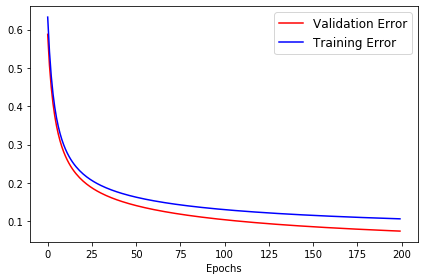

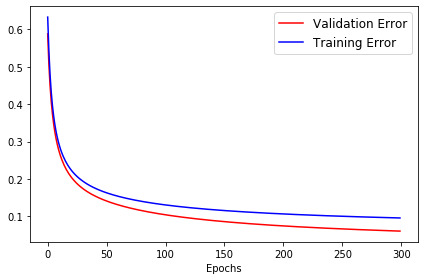

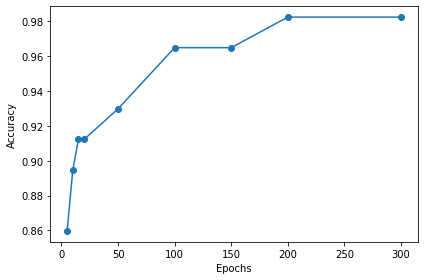

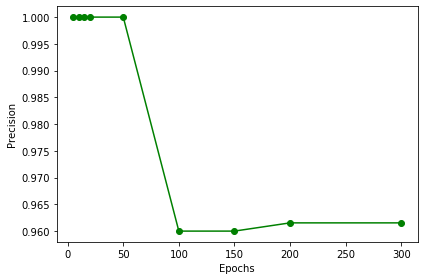

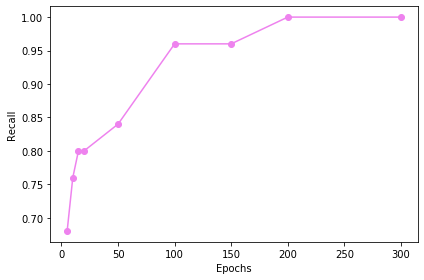

In [24]:
"""Accuracy, Precision and Recall Varying with epochs"""

def apr_plot(el,al,pl,rl):
    plt.plot(el,al,marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('Accuracy_vary_f.png')
    plt.show()

    plt.plot(el,pl,marker='o',color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.tight_layout()
    plt.savefig('Precision_vary_f.png')
    plt.show()


    plt.plot(el,rl,marker='o',color='violet')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.tight_layout()
    plt.savefig('Recall_vary_f.png')
    plt.show()



epoch_list=[5,10,15,20,50,100,150,200,300]
acc_list=[]
prec_list=[]
rec_list=[]

for epoch in epoch_list:
    weights=[random.uniform(0,0.01) for x in range(features)]
    training_error_list=[]
    validation_error_list=[]
    training(0.01,epoch)
    prediction_list=[]
    accl,precl,recl=testing()
    acc_list.append(accl)
    prec_list.append(precl)
    rec_list.append(recl)
    
apr_plot(epoch_list,acc_list,prec_list,rec_list)